# DSCI 503 - Project 03
### Bernard Mwamburi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Loading the Dataset; Preliminary Analysis
Load data into a DataFrame and explore the structure of the data set.

In [2]:
diamonds = pd.read_csv('diamonds.txt', sep='\t')
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


Explore size of the dataset

In [3]:
diamonds.shape

(53940, 10)

Use the describe() method to get a summary of the distribution of the columns in the dataset

In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Part 2: Filtering and Sorting
View information about the 5 most expensive diamonds

In [5]:
diamonds.loc[:, ['price', 'carat', 'cut', 'color', 'clarity']].sort_values('price', ascending=False).head(5)

,price,carat,cut,color,clarity
27750,18823,2.29,Premium,I,VS2
27749,18818,2.00,Very Good,G,SI1
27748,18806,1.51,Ideal,G,IF
27747,18804,2.07,Ideal,G,SI2
27746,18803,2.00,Very Good,H,SI1


View information about the 5 least expensive diamonds in the dataset.

In [6]:
diamonds.loc[:, ['price', 'carat', 'cut', 'color', 'clarity']].sort_values('price').head(5)

,price,carat,cut,color,clarity
1,326,0.23,Ideal,E,SI2
2,326,0.21,Premium,E,SI1
3,327,0.23,Good,E,VS1
4,334,0.29,Premium,I,VS2
5,335,0.31,Good,J,SI2


View information about the 5 largest diamonds in the dataset with an ideal cut.

In [7]:
diamonds.loc[(diamonds['cut'] == 'Ideal'), ['price', 'carat', 'cut', 'color', 'clarity']].sort_values('carat', ascending=False).head(5)

,price,carat,cut,color,clarity
24329,12587,3.50,Ideal,H,I1
24298,12545,3.22,Ideal,I,I1
26468,16037,3.01,Ideal,J,SI2
26745,16538,3.01,Ideal,J,I1
24785,13156,2.75,Ideal,D,I1


View information about the 5 largest diamonds in the dataset with a fair cut.

In [8]:
diamonds.loc[(diamonds['cut'] == 'Fair'), ['price', 'carat', 'cut', 'color', 'clarity']].sort_values('carat', ascending=False).head(5)

,price,carat,cut,color,clarity
27416,18018,5.01,Fair,J,I1
27631,18531,4.50,Fair,J,I1
27131,17329,4.13,Fair,H,I1
23645,11668,3.65,Fair,H,I1
26432,15964,3.40,Fair,D,I1


## Part 3: Working with Categorical Variables
Create lists to specify the order for each of the three categorical variables(cut, color, and clarity).

In [9]:
clarity_levels = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
cut_levels = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_levels = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

Use the lists to communicate to Pandas the correct order of the levels of the 3 categorical variables

In [10]:
diamonds.clarity = pd.Categorical(diamonds.clarity, clarity_levels)
diamonds.cut = pd.Categorical(diamonds.cut, cut_levels)
diamonds.color = pd.Categorical(diamonds.color, color_levels)

Create lists of named colors to serve as palettes to be used for visualizations later.

In [11]:
clarity_pal = ['maroon', 'tomato', 'darkgoldenrod', 'yellow', 'olivedrab', 'palegreen', 'navy', 'magenta']
cut_pal = ['rosybrown', 'red', 'yellow', 'forestgreen', 'purple']
color_pal = ['palevioletred', 'blueviolet', 'lime', 'aqua', 'goldenrod', 'brown', 'gold']

## Part 4: Displaying Counts for Categorical Variables
Count the number of diamonds for each level of cut.

In [12]:
diamonds.value_counts('cut').sort_index()

cut
Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
dtype: int64

Count the number of diamonds for each level of color.

In [13]:
diamonds.value_counts('color').sort_index()

color
J     2808
I     5422
H     8304
G    11292
F     9542
E     9797
D     6775
dtype: int64

Count the number of diamonds for each level of clarity.

In [14]:
diamonds.value_counts('clarity').sort_index()

clarity
I1        741
SI2      9194
SI1     13065
VS2     12258
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
dtype: int64

## Part 5: Scatterplots of Price Against Carat
Explore the relationship between the price and carat attributes by generating scatter plots.

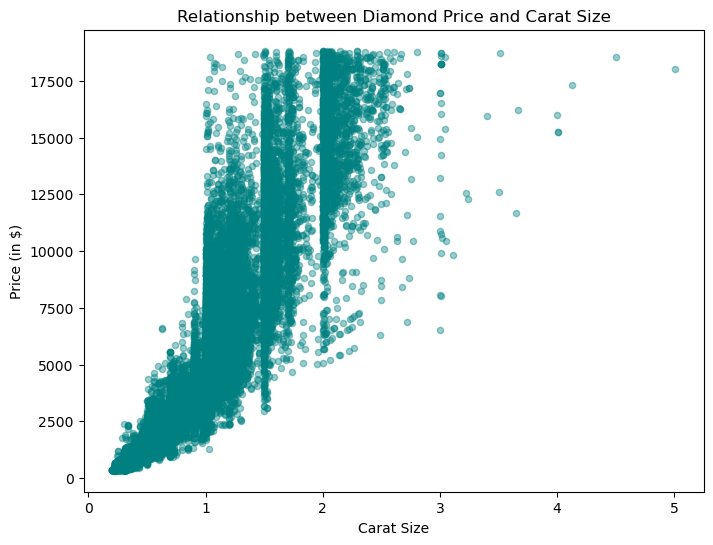

In [15]:
plt.figure(figsize=[8, 6])
plt.scatter(diamonds.carat, diamonds.price, s=20, alpha=0.4, color='teal')
plt.xlabel('Carat Size')
plt.ylabel('Price (in $)')
plt.title('Relationship between Diamond Price and Carat Size')

plt.show()

Reproduce the plot from above, but color the points according to their clarity.

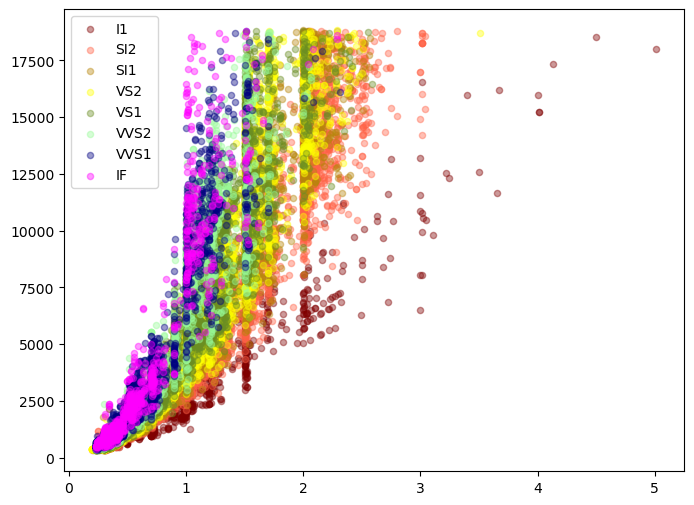

In [16]:
plt.figure(figsize=[8, 6])
for i, clar in enumerate(clarity_levels):
    
    clarity_level = diamonds[diamonds['clarity'] == clar]
    plt.scatter(clarity_level['carat'], clarity_level['price'], s=20, alpha=0.4, color=clarity_pal[i], label=clar)
    
plt.legend()

plt.show()

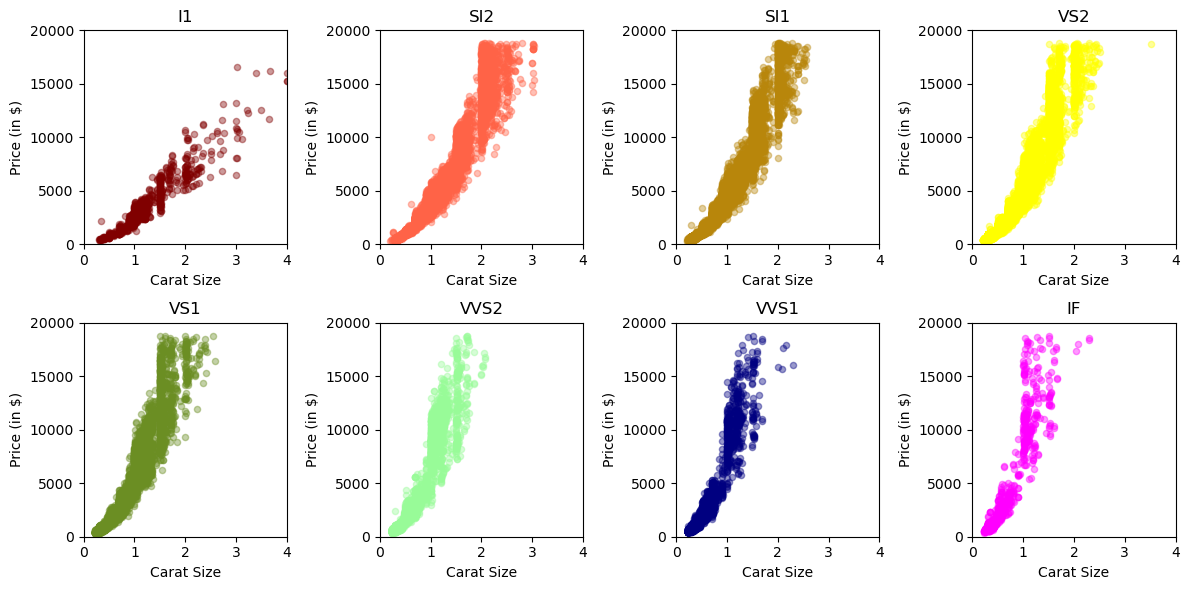

In [17]:
plt.figure(figsize=[12, 6])
for i, clar in enumerate(clarity_levels):
    plt.subplot(2, 4, i + 1)
    clarity_level = diamonds[diamonds['clarity'] == clar]
    plt.scatter(clarity_level['carat'], clarity_level['price'], s=20, alpha=0.4, color=clarity_pal[i], label=clar)
    plt.xlabel('Carat Size')
    plt.ylabel('Price (in $)')
    plt.title(clar)
    plt.xlim([0, 4])
    plt.ylim([0, 20000])
    
plt.tight_layout()
plt.show()

## Part 6: Applying Logarithmic Transformations
Add two new columns to the diamonds dataframe in order to store treansformed variables.

In [18]:
diamonds.loc[:, 'ln_carat'], diamonds.loc[:, 'ln_price'] = np.log(diamonds.carat), np.log(diamonds.price)

Histogram to explore the distribution of the diamond prices, and log of the diamond prices.

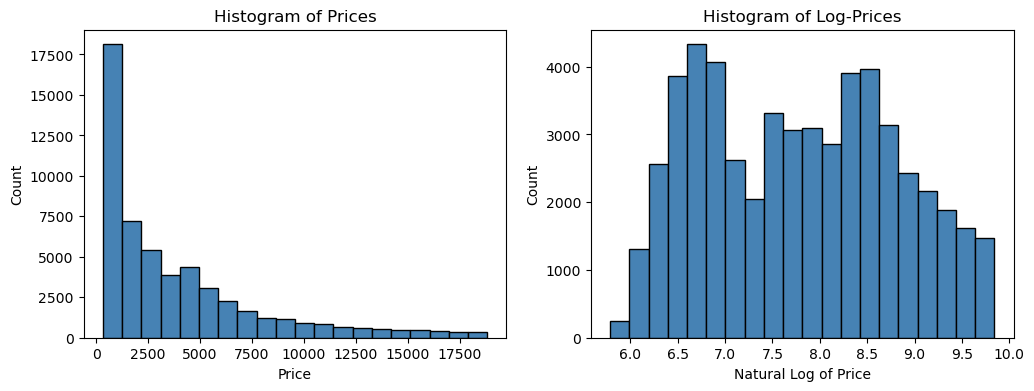

In [19]:
plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.hist(diamonds.price, bins=20, edgecolor='black', color='steelblue')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram of Prices')
plt.subplot(1, 2, 2)
plt.hist(diamonds.ln_price, bins=20, edgecolor='black', color='steelblue')
plt.xlabel('Natural Log of Price')
plt.ylabel('Count')
plt.title('Histogram of Log-Prices')

plt.show()

Histogram to explore the distribution of the carat sizes, and the log of the carat sizes.

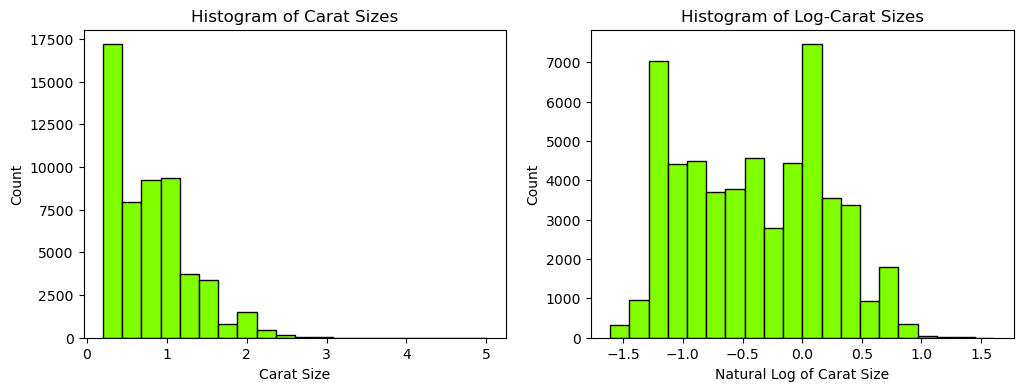

In [20]:
plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.hist(diamonds.carat, bins=20, edgecolor='black', color='chartreuse')
plt.xlabel('Carat Size')
plt.ylabel('Count')
plt.title('Histogram of Carat Sizes')
plt.subplot(1, 2, 2)
plt.hist(diamonds.ln_carat, bins=20, edgecolor='black', color='chartreuse')
plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Count')
plt.title('Histogram of Log-Carat Sizes')

plt.show()

## Part 7: Scatterplot of Transformed Variables
Create scatterplot of ln_price against ln_carat with points colore according to their clarity.

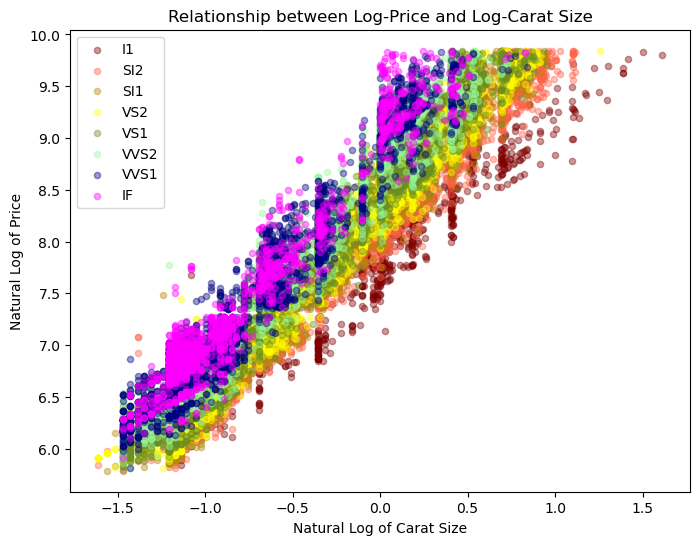

In [21]:
plt.figure(figsize=[8, 6])
for i, clar in enumerate(clarity_levels):
    
    clarity_level = diamonds[diamonds['clarity'] == clar]
    plt.scatter(clarity_level['ln_carat'], clarity_level['ln_price'], s=20, alpha=0.4, color=clarity_pal[i], label=clar)
    
plt.legend()
plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Natural Log of Price')
plt.title('Relationship between Log-Price and Log-Carat Size')

plt.show()

## Part 8: Grouping by Cut
Create a grouped DataFrame displaying the mean price and carat size for each cut level.

In [22]:
gb_cut = diamonds.loc[:, ['cut', 'price', 'carat']].groupby('cut').mean()

Use bar charts to graphically display the information from above.

Text(0.5, 1.0, 'Mean Carat Size by Cut')

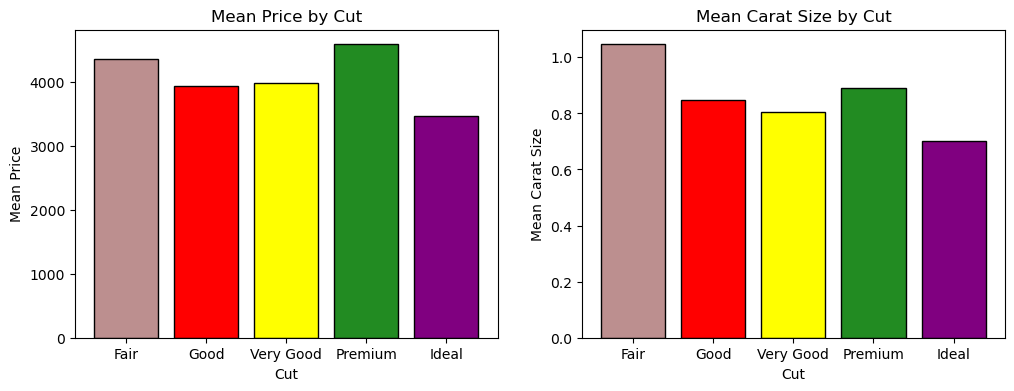

In [23]:
plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.bar(gb_cut.index, gb_cut["price"], edgecolor='black', color=cut_pal)
plt.xlabel('Cut')
plt.ylabel('Mean Price')
plt.title('Mean Price by Cut')
plt.subplot(1, 2, 2)
plt.bar(gb_cut.index, gb_cut["carat"], edgecolor='black', color=cut_pal)
plt.xlabel('Cut')
plt.ylabel('Mean Carat Size')
plt.title('Mean Carat Size by Cut')

## Part 9: Grouping by Color
Create a grouped dataframe displaying the mean price and color for each color level.

In [24]:
gb_color = diamonds.loc[:, ['color', 'price', 'carat']].groupby('color').mean()

Use bar charts to graphically display the information from above.

Text(0.5, 1.0, 'Mean Carat Size by Color')

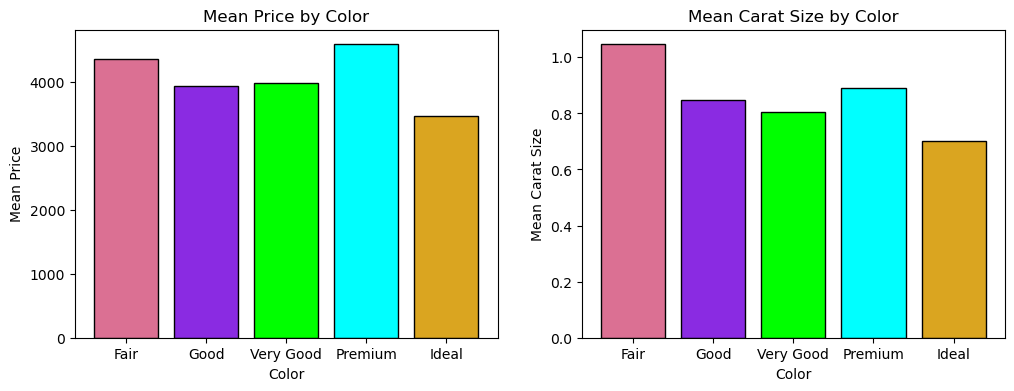

In [25]:
plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.bar(gb_cut.index, gb_cut["price"], edgecolor='black', color=color_pal)
plt.xlabel('Color')
plt.ylabel('Mean Price')
plt.title('Mean Price by Color')
plt.subplot(1, 2, 2)
plt.bar(gb_cut.index, gb_cut["carat"], edgecolor='black', color=color_pal)
plt.xlabel('Color')
plt.ylabel('Mean Carat Size')
plt.title('Mean Carat Size by Color')

## Part 10: Grouping by Clarity
Create a grouped dataframe displaying the mean price and carat size for each clarity level.

In [26]:
gb_clarity = diamonds.loc[:, ['clarity', 'price', 'carat']].groupby('clarity').mean()

Use bar charts to graphically display the information from above.

Text(0.5, 1.0, 'Mean Carat Size by Clarity')

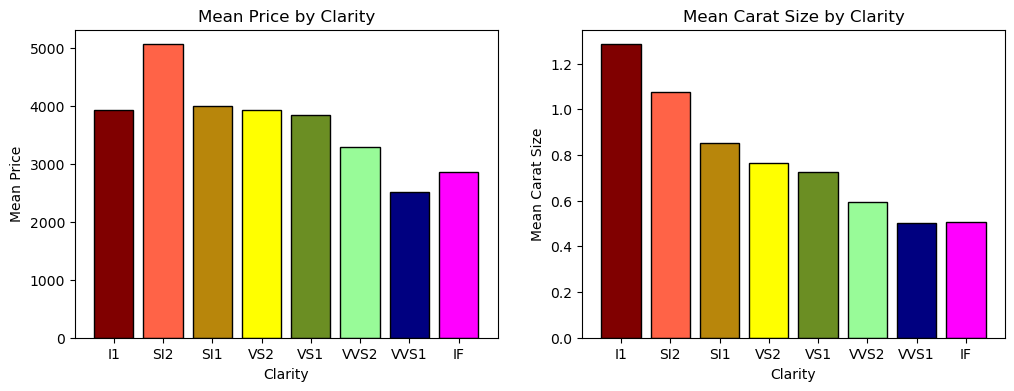

In [27]:
plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.bar(gb_clarity.index, gb_clarity["price"], edgecolor='black', color=clarity_pal)
plt.xlabel('Clarity')
plt.ylabel('Mean Price')
plt.title('Mean Price by Clarity')
plt.subplot(1, 2, 2)
plt.bar(gb_clarity.index, gb_clarity["carat"], edgecolor='black', color=clarity_pal)
plt.xlabel('Clarity')
plt.ylabel('Mean Carat Size')
plt.title('Mean Carat Size by Clarity')